## Objective
* Learn basics of  Pytorch

## Prerequisites

* Python
* NumPy



We will start with very basic concepts of PyTorch. So, let’s start with importing PyTorch.The package is called torch, based on its original framework [Torch](http://torch.ch/).

In [ ]:
import torch 
print('Version : ', torch. __version__)

Version :  1.11.0+cu113


Here, we checked the imported version of Pytorch.

In every framework, there are functions that are stochastic like generating random numbers.  It is very good practice to set up your code to be reproducible with the exact same random numbers. Pytorch also provides the function called `seed()` to perform this task.

In [ ]:
torch.manual_seed(50) # Setting the seed

# Tensor

In PyTorch, Tensors are equivalent to Numpy arrays with the additional support of GPU.

## Initialization

There are multiple ways of creating a tensor, the simplest one is to call a `torch.Tensor()`. The desired shape of the tensor can be created by passing the shape as an input argument to the `torch.Tensor()`.

In [ ]:
a = torch.Tensor(3,3)
print(a)

tensor([[3.6326e-35, 0.0000e+00, 3.7835e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.3733e-14, 6.4069e+02, 4.3066e+21]])


There are many alternatives for initialization, some of them are given below:

* `torch.ones:` Creates a tensor filled with ones.
* `torch.rand:` Creates a tensor with random values uniformly sampled between 0 and 1.
* `torch.zeros:` Creates a tensor filled with zeros.
* `torch.randn:` Creates a tensor with random values sampled from a normal distribution with mean 0 and variance 1.
* `torch.arange:` Creates a tensor containing the values in a certain range.


You can obtain the shape of the tensor using `.shape` or `.size` method.

In [ ]:
shape = a.shape
print("Shape:", a.shape)

size = a.size()
print("Size:", size)

dim1, dim2 = a.size()
print("Size:", dim1, dim2)

Shape: torch.Size([3, 3])
Size: torch.Size([3, 3])
Size: 3 3


## Operations

Pytorch has most of the operations that exist in NumPy. Here, we will review the most important operations only. A full list of operations can be found in 
the [PyTorch documentation](https://pytorch.org/docs/stable/tensors.html#) .

The simplest operation is to add two tensor.

In [ ]:
a1 = torch.rand(3, 3)
a2 = torch.rand(3, 3)
sum = a1 + a2

print("A1", a1)
print("A2", a2)
print("Sum", sum)

A1 tensor([[0.6180, 0.0687, 0.3893],
        [0.0404, 0.4013, 0.1442],
        [0.4605, 0.4877, 0.5927]])
A2 tensor([[0.9634, 0.1230, 0.4048],
        [0.4985, 0.9987, 0.6049],
        [0.5229, 0.6974, 0.2505]])
Sum tensor([[1.5814, 0.1917, 0.7940],
        [0.5389, 1.4001, 0.7490],
        [0.9834, 1.1851, 0.8432]])


Here, a1+a2 creates a new tensor containing the sum of the two inputs.

Other commonly used operations include matrix multiplications, which are essential for deep learning. Suppose, we have an input vector 
**x**
, which is transformed using a weight matrix 
**W**. The transformation can be done in different ways, some of them are :


* `torch.matmul:` Performs the matrix product over two tensors.

* `torch.mm:` Performs the matrix product over two matrices, but doesn’t support broadcasting.




Most of the time, we use `torch.matmul` for matrix multiplication.

In [ ]:
x = torch.rand(2,3) #input vector
W = torch.rand(3,3) #random weight
h = torch.matmul(x,W) #matrix operation
print('H: ', h)

H:  tensor([[0.6526, 0.6393, 0.3153],
        [0.2436, 0.3016, 0.0836]])


## Indexing

Sometime we may need to select a part of the tensor. This can be done just like in NumPy.

In [ ]:
a = torch.arange(16).view(4,4) #creating 4 by 4 tensor
a

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

In [ ]:
print(a[:,3]) # fourth column

tensor([ 3,  7, 11, 15])


In [ ]:
print(a[2,:]) # third row 

tensor([ 8,  9, 10, 11])


In [ ]:
print(a[:3, -2]) # First three rows of second last column

tensor([ 2,  6, 10])


# Forward Propagation

Forward propagation refers to the process in which the input features 'flow' through the layers of a neural network to produce an output.


For example, if you have a neural network that can classify images into two labels, say dogs and cats. Forward propagation is the process in which the network takes in an input image and transforms the image in each layer. As the layer transforms the image, features, and patterns in the image are expressed more strongly. The output layer of the neural network then classifies the features from the last hidden layer to one of the two labels.

![alt](https://upload.wikimedia.org/wikipedia/commons/3/30/Multilayer_Neural_Network.png)




Consider the neural network depicted in the image above.
1. It takes in 3 values as its input in the input layer.
2. In the first hidden layer, 4 neurons each take a weighted combination of the features from the input layer. Think of each line as a weight. The output from a first hidden layer is a vector of size 4, each dimension corresponding to the output of one of the 4 neurons.
3. In the second hidden layer, 2 neurons take a weighted combination of the outputs of the first hidden layer.
4. In the output layer, 2 neurons take a weighted combination of the outputs of the second hidden layer. The output of this network is a vector of size 2.


The first hidden layer has 4 neurons, and each of these neurons are connected with 2 neurons from the input layer. Therefore each of these 4 neurons has 2 weights, one for each neuron in the input layer.


Here we are going to start with a simple example. 
 
Let's assume that we have a model, it could be a neural network or some other type of classifier. For simplicity and visualization, instead of using large multi-dimensional tensors, we are going to use scalars. Our graph has nodes `a, b, c, and d` and some operations between the nodes, like adding `node a with node b` or multiplying `node c with node d`. Our job is to do all the operations until we get the result g.


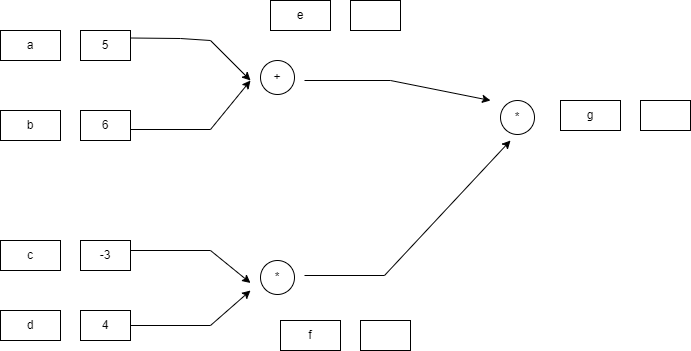

By manually calculating you can get the value as shown below:

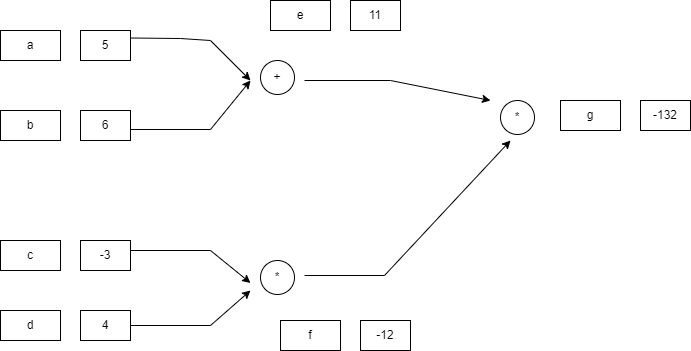

Let's implement it on PyTorch. 

In [ ]:
import torch
a = torch.Tensor([5])
b = torch.Tensor([6])
c = torch.Tensor([-3])
d = torch.Tensor([4])

e = a + b
f = c * d
g = e * f 

print(e, f, g)


tensor([11.]) tensor([-12.]) tensor([-132.])


We first initialize **tensors a, b, c, and d**, to their corresponding values **5, 6, -3, and 4** respectively. We then add a and b putting result in tensor e, and we multiply c with d, putting the result in tensor f. Finally, we multiply e with f, putting the result in tensor g, and then we print the values of these three tensors, getting the same result as in the manual calculation.

# Differentiation In Pytorch

Derivatives are simple with PyTorch. Like many other neural network libraries, PyTorch includes an automatic differentiation package, [autograd](https://pytorch.org/docs/master/autograd.html). This is very helpful during backpropagation.

In [ ]:
x = torch.tensor(10.0, requires_grad = True)
y = (x+1)/x 

y.backward()
print("Dervative of the equation at x = 10 is: ", x.grad)

Dervative of the equation at x = 10 is:  tensor(-0.0100)


At first, we defined the value (10) we want to compute the derivative with regard to as a PyTorch Variable object and specify that it should be instantiated in such a way that it tracks where in the computation graph it connects to in order to perform differentiation by the chain rule (requires_grad)
 
Then, we defined the function for it.
Here, autograd's  [backward()](https://pytorch.org/docs/master/autograd.html#torch.autograd.backward) compute the sum of gradients, using the chain rule.

More examples of Differentiation.

In [ ]:
x = torch.tensor(5.0, requires_grad = True)
y = 9*x**2 + 2*x**2  + 9*x + 5

y.backward()
print("Dervative of the equation at x = 5 is: ", x.grad)


Dervative of the equation at x = 5 is:  tensor(119.)


# Loss Functions

Loss for a batch can be calculated by performing a few tensor operations . For example , for binary classification, we can use Binary Cross-Entropy (BCE) which is defined as follows:

$$
 \ Loss =- \frac{1}{m} \sum_{i=1}^m y_i \log (x_i) + (1-y_i) \log (1-x_i ) 
$$

PyTorch already provides a list of predefined loss functions which we can use.
For example, for BCE, PyTorch has two modules: `nn.BCELoss()`, `nn.BCEWithLogitsLoss()`. 

`nn.BCELoss` needs the inputs **x**
 to be in the range [0,1] i.e. the output of a sigmoid whereas  
 `nn.BCEWithLogitsLoss` combines a sigmoid layer and the BCE loss in a single class.
 
 A full list of the loss functions can be found [here](https://pytorch.org/docs/stable/nn.html#loss-functions)

# GPU support

An important feature of PyTorch is the support of the Graphics Processing Unit (GPUs). A GPU can perform many thousands of small operations in parallel, so it can speed up large matrix operations in neural networks. 
PyTorch implements a lot of functionality for supporting GPUs (mostly those of NVIDIA due to the libraries [CUDA](https://developer.nvidia.com/cuda-zone) and [cuDNN](https://developer.nvidia.com/cudnn). First, let’s check whether you have a GPU available:

In [ ]:
gpu_avai = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avai}")

Is the GPU available? True


All tensors you create are stored on the CPU automatically but we can push a tensor to the GPU by using the function `.to(...), or .cuda().` 

However, it is often a good practice to define a device object in your code that points to the GPU if you have one and otherwise to the CPU. 
Let’s try it below. We can specify the device as follows:


In [ ]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", dev)

Device cuda


Now let’s create a tensor and push it to the device:

In [ ]:
x = torch.ones(3, 3)
x = x.to(dev)
print("X", x)

X tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')


We have GPU so, we can see attribute `device='cuda:0'`

Reference

[PYTORCH DOCUMENTATION](https://pytorch.org/docs/stable/index.html#pytorch-documentation)

## Key Takeaways:
1. Tensors are equivalent to Numpy arrays with the additional support of GPU.